In [ ]:
import kagglehub
import shutil
import os

# Download the latest version
path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")

print("Path to dataset files:", path)

# Copy dataset to /content
destination_path = '/content'

# Copy all files from the dataset folder to /content
for file_name in os.listdir(path):
    full_file_name = os.path.join(path, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, destination_path)

print(f"Files copied to {destination_path}")


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [4]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [5]:
train.shape

(3599792, 3)

In [6]:
test.shape

(399975, 3)

In [7]:
train = train.head(10000)
test = test.head(10000)

In [8]:
train

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
9995,2,Great biography of a very interesting journalist,"This biography of Arthur Aull, a small-town jo..."
9996,1,Interesting Subject; Poor Presentation,You'd be hard-pressed to tell a boring story a...
9997,1,Don't buy,The box looked used and it is obviously not ne...
9998,2,Beautiful Pen and Fast Delivery.,The pen was shipped promptly. This is the clas...


In [9]:
column_names=['polarity','title','text']
train.columns=column_names
test.columns=column_names

In [10]:
train.head()

,polarity,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [11]:
train.isnull().sum()

,0
polarity,0
title,0
text,0


In [12]:
test.isnull().sum()

,0
polarity,0
title,0
text,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polarity  10000 non-null  int64 
 1   title     10000 non-null  object
 2   text      10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [14]:
train.describe()

,polarity
count,10000.000000
mean,1.490200
std,0.499929
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


array([[<Axes: title={'center': 'polarity'}>]], dtype=object)

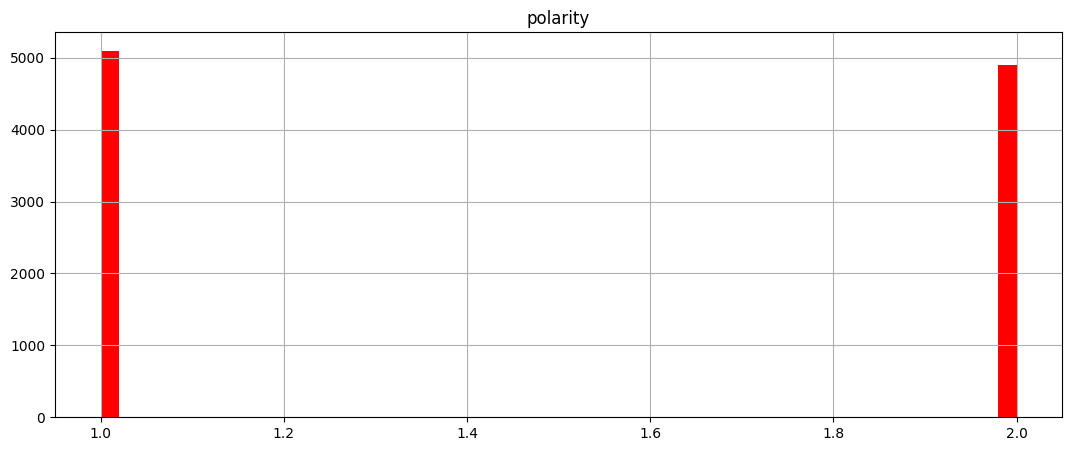

In [15]:
train.hist(figsize=(13,5),bins=50, color = 'red')

In [16]:
train['polarity'].value_counts()

,count
polarity,
1,5098
2,4902


In [17]:
train['length'] = train['text'].apply(len)

<Axes: ylabel='Frequency'>

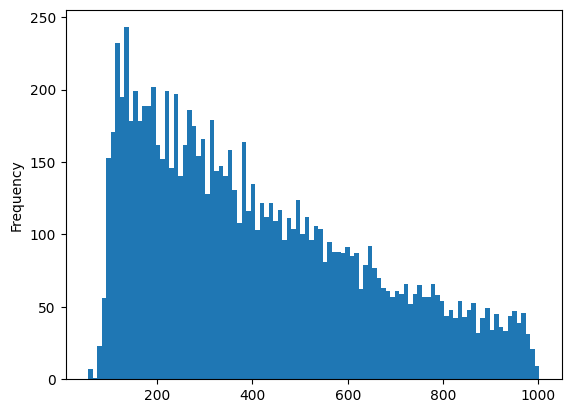

In [18]:
train['length'].plot(bins=100,kind='hist')

In [19]:
positive= train[train['polarity']==2]
negative= train[train['polarity']==1]

In [20]:
positive_list=positive['text'].tolist()
positive_sentence="".join(positive_list)

negative_list=negative['text'].tolist()
negative_sentence="".join(negative_list)

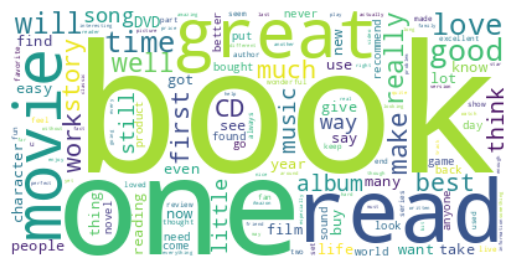

In [21]:
wordcloud = WordCloud(background_color='white').generate(positive_sentence)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')  # Show the word cloud
plt.axis('off')  # Hide axes
plt.show()  # Display the plot

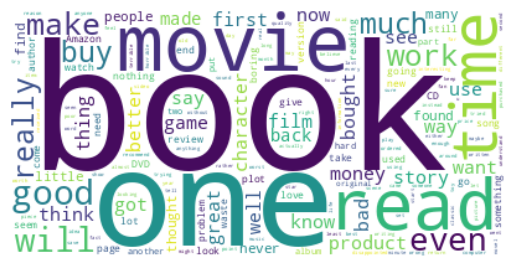

In [22]:
wordcloud = WordCloud(background_color='white').generate(negative_sentence)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')  # Show the word cloud
plt.axis('off')  # Hide axes
plt.show()

In [23]:
#Preprocessing

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
import string
from nltk.corpus import stopwords

# Load stopwords only once
stop_words = set(stopwords.words('english'))

def cleaning(content):
    # Remove punctuation
    no_punc = "".join([char for char in content if char not in string.punctuation])

    # Remove stopwords
    cleaned_words = [word for word in no_punc.split() if word.lower() not in stop_words]

    return cleaned_words

# Apply cleaning
clean_text = train['text'].apply(cleaning)


In [26]:
clean_text

,text
0,"[Im, reading, lot, reviews, saying, best, game..."
1,"[soundtrack, favorite, music, time, hands, int..."
2,"[truly, like, soundtrack, enjoy, video, game, ..."
3,"[youve, played, game, know, divine, music, Eve..."
4,"[quite, sure, actually, taking, time, read, pl..."
...,...
9995,"[biography, Arthur, Aull, smalltown, journalis..."
9996,"[Youd, hardpressed, tell, boring, story, pluck..."
9997,"[box, looked, used, obviously, new, tried, con..."
9998,"[pen, shipped, promptly, classic, Montblanc, p..."


In [27]:
vectorizer=CountVectorizer(analyzer=cleaning,dtype=np.uint8)

In [28]:
text_vector=vectorizer.fit_transform(train['text'])

In [29]:
print(vectorizer.get_feature_names_out())

['0' '000' '001' ... 'étai' 'étre' 'éviter']


In [30]:
print(text_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [31]:
text_vector.shape

(10000, 45747)

In [32]:
X=pd.DataFrame(text_vector.toarray())

In [33]:
y=train['polarity']

In [34]:
X.shape, y.shape

((10000, 45747), (10000,))

In [35]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [37]:
y_pred=NB_classifier.predict(X_test)

In [38]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

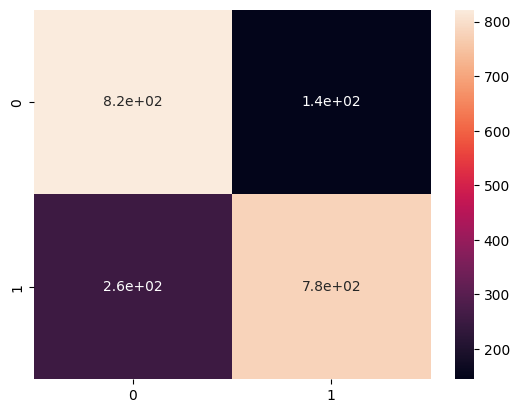

In [39]:
sns.heatmap(cm,annot=True)

In [40]:
y_pred

array([2, 1, 1, ..., 1, 1, 1])

In [41]:
y_test

,polarity
8693,1
1292,2
8631,1
3295,2
6843,2
...,...
4536,1
4056,1
1355,1
3246,1


In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8005


In [44]:
import joblib

# Save the trained model
joblib.dump(NB_classifier, 'nb_model.pkl')


# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')  # vectorizer can be CountVectorizer or TfidfVectorizer

['nb_model.pkl']

In [46]:
import gradio as gr
import joblib

# Load model and vectorizer
model = joblib.load("nb_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")

def predict_sentiment(text):
    vectorized = vectorizer.transform([text])
    prediction = model.predict(vectorized)[0]
    return "Positive" if prediction == 2 else "Negative"

iface = gr.Interface(fn=predict_sentiment,
                     inputs="textbox",
                     outputs="label",
                     title="Review Sentiment Classifier")

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2ac9bfc0211b871527.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [48]:
test.head()

,polarity,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
